In [2]:
import re
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
beers_csv = "beers.csv"
breweries_csv = "breweries.csv"

beers_df = pd.read_csv(beers_csv)
breweries_df = pd.read_csv(breweries_csv)
beers_df.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [4]:
breweries_df = breweries_df.rename(columns={"Unnamed: 0":"brewery_id"})
breweries_df

,brewery_id,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


In [5]:
# pd.merge(beers_df, breweries_df, )
poop_df = breweries_df.merge(beers_df, on="brewery_id")
poop_df

,brewery_id,name_x,city,state,Unnamed: 0,abv,ibu,id,name_y,style,ounces
0,0,NorthGate Brewing,Minneapolis,MN,1493,0.045,50.0,2692,Get Together,American IPA,16.0
1,0,NorthGate Brewing,Minneapolis,MN,1494,0.049,26.0,2691,Maggie's Leap,Milk / Sweet Stout,16.0
2,0,NorthGate Brewing,Minneapolis,MN,1495,0.048,19.0,2690,Wall's End,English Brown Ale,16.0
3,0,NorthGate Brewing,Minneapolis,MN,1496,0.060,38.0,2689,Pumpion,Pumpkin Ale,16.0
4,0,NorthGate Brewing,Minneapolis,MN,1497,0.060,25.0,2688,Stronghold,American Porter,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2405,556,Butternuts Beer and Ale,Garrattsville,NY,488,0.049,NaN,52,Heinnieweisse Weissebier,Hefeweizen,12.0
2406,556,Butternuts Beer and Ale,Garrattsville,NY,489,0.068,NaN,51,Snapperhead IPA,American IPA,12.0
2407,556,Butternuts Beer and Ale,Garrattsville,NY,490,0.049,NaN,50,Moo Thunder Stout,Milk / Sweet Stout,12.0
2408,556,Butternuts Beer and Ale,Garrattsville,NY,491,0.043,NaN,49,Porkslap Pale Ale,American Pale Ale (APA),12.0


In [6]:
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in df.columns:
        print(column_name, ": ", get_var_category(df[column_name]))

In [7]:
brew_group = poop_df.groupby('style')

In [8]:
count_brew = brew_group['style'].count()

count_brew

style
Abbey Single Ale                2
Altbier                        13
American Adjunct Lager         18
American Amber / Red Ale      133
American Amber / Red Lager     29
                             ... 
Tripel                         11
Vienna Lager                   20
Wheat Ale                       1
Winter Warmer                  15
Witbier                        51
Name: style, Length: 99, dtype: int64

In [9]:
state_data = poop_df["state"].value_counts()
style_data = poop_df["style"].value_counts()

In [10]:
style_state_data= state_data.add(style_data, fill_value=0)

NameError: name 'state_chart' is not defined

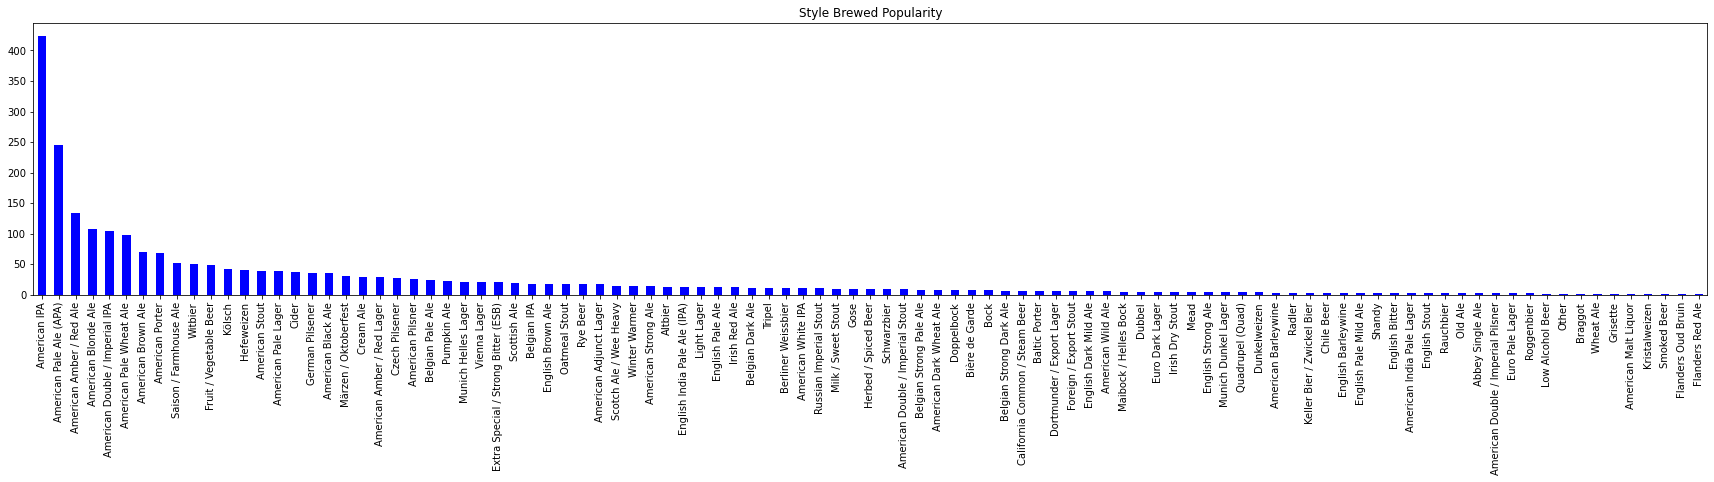

In [11]:
style_chart = style_data.plot(kind='bar', facecolor="blue", figsize=(30,5))
plt.title("Style Brewed Popularity")
state_chart.set_xlabel("Style")
state_chart.set_ylabel("Number of Times Brewed")
plt.show()
plt.tight_layout

In [ ]:
state_data = poop_df["state"].value_counts()

In [ ]:
state_chart = state_data.plot(kind='bar', facecolor="blue", figsize=(10,5))
plt.title("State Brewery Popularity")
state_chart.set_xlabel("State")
state_chart.set_ylabel("Number of Breweries")
plt.show()
plt.tight_layout

In [ ]:
state_and_style = poop_df[["state","style"]]
state_and_style = state_and_style.set_index("state")
state_and_style

In [ ]:
state_and_style_df = pd.DataFrame(state_and_style)

In [ ]:
plt.style.use('ggplot')

state_and_style_df.groupby(['state', 'style'])\
      .style.count().unstack().plot.bar(legend=True, figsize=(50,10))

In [ ]:
abv_and_style = poop_df[["abv","style"]]
abv_and_style = state_and_style.set_index("style")
abv_and_style

In [ ]:
state_and_style = poop_df[["state","style"]]
state_and_style = state_and_style.set_index("state")
state_and_style

In [ ]:
poop_df.nlargest(5, ['abv'])

In [ ]:
top_5 = poop_df.nlargest(5, ['abv'])

In [ ]:
top_5

In [ ]:
#state_chart = state_data.plot(kind='bar', facecolor="blue", figsize=(10,5))
# plt.title("State Brewery Popularity")
# state_chart.set_xlabel("State")
# state_chart.set_ylabel("Number of Breweries")
# plt.show()
# plt.tight_layout

xlabel = 'style'
ylabel = 'abv'
top_5_chart = top_5.plot(kind='bar', facecolor="blue", figsize=(10,5))
plt.title("ABV by style")
top_5_chart.set_xlabel("style")
top_5_chart.set_ylabel("abv")
plt.show()
plt.tight_layout

In [ ]:
abv_and_style = poop_df[["style","abv"]]
abv_and_style = abv_and_style.set_index("style")
abv_and_style

In [ ]:
new_poop_df=poop_df.dropna()
new_poop_df

In [ ]:
sorted_poop_df=new_poop_df.sort_values(by='abv', ascending=False)
sorted_poop_df

In [12]:
# top_5 = poop_df.nlargest(5, ['abv'])
top_30 = new_poop_df.nlargest(30, ['abv'])
top_30

NameError: name 'new_poop_df' is not defined

In [13]:
top_30.plot(kind='scatter', x='style', y='abv', grid=True, figsize=(20,10), 
                       title=f' Correlation of Style and ABV')
plt.grid()
plt.tight_layout()

NameError: name 'top_30' is not defined

In [14]:
# poop_df.plot(kind='scatter', x='style', y='abv', 
#                        title=f' Correlation of Style and ABV')
# plt.grid()

In [15]:
# state_data = poop_df["state"].value_counts()
# style_data = poop_df["style"].value_counts()
# style_state_data= state_data.add(style_data, fill_value=0)
# style_chart = style_data.plot(kind='bar', facecolor="blue", figsize=(30,5))
# plt.title("Style Brewed Popularity")
# state_chart.set_xlabel("Style")
# state_chart.set_ylabel("Number of Times Brewed")
# plt.show()
# plt.tight_layout

abv_data = poop_df["abv"].value_counts()

In [16]:
style_data

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
American Malt Liquor                1
Kristalweizen                       1
Smoked Beer                         1
Flanders Oud Bruin                  1
Flanders Red Ale                    1
Name: style, Length: 99, dtype: int64

In [17]:
abv_data

0.050    215
0.055    158
0.060    125
0.065    123
0.052    107
        ... 
0.128      1
0.034      1
0.028      1
0.094      1
0.125      1
Name: abv, Length: 74, dtype: int64

In [18]:
top_5.boxplot("abv", by="style", figsize=(20, 10))

NameError: name 'top_5' is not defined

In [19]:
xlabel = 'style'
ylabel = 'abv'
top_5_chart = top_5.plot(kind='bar', facecolor="blue", figsize=(10,5))
plt.title("ABV by style")
top_5_chart.set_xlabel("style")
top_5_chart.set_ylabel("abv")
plt.show()
plt.tight_layout

NameError: name 'top_5' is not defined

In [20]:
group1 = poop_df[poop_df["style"] == "Quadrupel (Quad)"]["abv"]
group2 = poop_df[poop_df["style"] == "English Barleywine"]["abv"]
group3 = poop_df[poop_df["style"] == "Russian Imperial Stout"]["abv"]
group4 = poop_df[poop_df["style"] == "Rye Beer"]["abv"]

In [21]:
st.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=16.974056971673452, pvalue=8.914483349494272e-07)

In [22]:
poop_5 = poop_df.nlargest(5, )
poop_5['state'].value_counts(15).plot(kind = "pie", explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
explode = (.2, 0, 0, 0)
plt.title("States with Highest ABV")


NameError: name 'poop_5' is not defined